In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plt_plot(y_real):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='b')
    plt.show()
    
def mkdir(path):
    path = path.strip()# 去除尾部 \ 符号
    path = path.rstrip("\\")
    isExists = os.path.exists(path)
    if  isExists:
        print(path ,'directory has existed')
        return False
    else:
        os.makedirs(path)
        print(path,' create successful')
        return True

In [3]:
# source_dire='../01-TrainingData-additional'
source_dire='../02-TestingData-keD1'

In [5]:
for _ in  range(1,6):
    data_dire=os.path.join(source_dire,'0'+str(_),'Sensor')
    file_dire=os.path.join(source_dire,'0'+str(_),'Sensor1')
    mkdir(file_dire)
    file_list=os.listdir(data_dire)
    for file_index in range(1,len(file_list)+1):
        df_signal=pd.read_csv(os.path.join(data_dire,str(file_index)+".csv"))
        print(file_index)

        worng_index_list=df_signal[(df_signal['vibration_1']>20)|(df_signal['vibration_1']<-20)].index
        for index in worng_index_list:
            df_signal['vibration_1'][index]=df_signal['vibration_1'][index-1]
        worng_index_list=df_signal[(df_signal['vibration_2']>20)|(df_signal['vibration_2']<-20)].index
        for index in worng_index_list:   
            df_signal['vibration_2'][index]=df_signal['vibration_2'][index-1]
        worng_index_list=df_signal[(df_signal['vibration_3']>20)|(df_signal['vibration_3']<-20)].index
        for index in worng_index_list:   
            df_signal['vibration_3'][index]=df_signal['vibration_3'][index-1]
        worng_index_list=df_signal[(df_signal['current']>70)|(df_signal['current']<-70)].index
        for index in worng_index_list:   
            df_signal['current'][index]=df_signal['current'][index-1]
        df_signal.to_csv(os.path.join(file_dire,str(file_index)+".csv"),index=False)

../02-TestingData-keD1/01/Sensor1 directory has existed
1
2
3
4
5
6
7
8
9
10
../02-TestingData-keD1/02/Sensor1 directory has existed
1
2
3
4
5
6
7
8
9
10
../02-TestingData-keD1/03/Sensor1 directory has existed
1
2
3
4
5
6
7
8
9
10
../02-TestingData-keD1/04/Sensor1 directory has existed
1
2
3
4
5
6
7
8
9
10
../02-TestingData-keD1/05/Sensor1 directory has existed
1
2
3
4
5
6
7
8
9
10


In [23]:
for _ in  range(2,3):
    file_dire=os.path.join(source_dire,'0'+str(_),'Sensor1')
    file_list=os.listdir(file_dire)
    for file_index in range(1,len(file_list)+1):
        df_sensor_raw=pd.read_csv(os.path.join(file_dire,str(file_index)+".csv"))
        print(file_index)
        if df_sensor_raw['current'][df_sensor_raw['current']>60].empty is False:#有非加工数据存在
            y_vibration1=pd.to_numeric(df_sensor_raw["current"])
            vibration_60=df_sensor_raw["current"][df_sensor_raw["current"]>=60]
            index_list=list(vibration_60.index)
            defect_index_list=[]
            last_index=index_list[0]

            if index_list[-1]-index_list[0]<15000:
                defect_index_list.append(index_list[0]-10000)
                defect_index_list.append(index_list[-1]+10000)

                arr=df_sensor_raw[0:defect_index_list[0]]["current"]>30
                df_new_left_index=list(df_sensor_raw[0:defect_index_list[0]][arr].index)
                brr=df_sensor_raw[defect_index_list[1]:-1]["current"]>30
                df_new_right_index = list(df_sensor_raw[defect_index_list[1]:-1][brr].index)
                if df_new_left_index==[]:
                    df_new = df_sensor_raw[df_new_right_index[0]:df_new_right_index[-1]]
                elif df_new_right_index==[]:
                    df_new = df_sensor_raw[df_new_left_index[0]:df_new_left_index[-1]]
                else:
                    df_new_left= df_sensor_raw[df_new_left_index[0]:df_new_left_index[-1]]
                    df_new_right=df_sensor_raw[df_new_right_index[0]:df_new_right_index[-1]]
                    df_new=pd.concat([df_new_left,df_new_right],axis=0)
            else:
                for index_temp in index_list:
                    if vibration_60[index_temp]-vibration_60[last_index]>5000:
                        defect_index_list.append(last_index-10000)
                        defect_index_list.append(index_temp+10000)
                df_new1=df_sensor_raw[0:defect_index_list[0]]
                df_new2 = df_sensor_raw[defect_index_list[1]:-1]
                df_new=pd.concat([df_new1,df_new2],axis=0)

            df_new.to_csv(os.path.join(file_dire,str(file_index)+".csv"),index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [8]:
for _ in  range(1,4):#处理nan值
    file_dire=os.path.join(source_dire,'0'+str(_),'Sensor1')
    file_list=os.listdir(data_dire)
    for file_index in range(1,len(file_list)+1):
        df_sensor_raw=pd.read_csv(os.path.join(file_dire,str(file_index)+".csv"))
        print(file_index)
        nan_table=np.where(np.isnan(df_sensor_raw))
        if nan_table:
            print(nan_table)
            for nan_index in range(len(nan_table[1])):                
                df_sensor_raw.iloc[nan_table[0][nan_index]][nan_table[1][nan_index]]=df_sensor_raw.iloc[nan_table[0][nan_index]-1][nan_table[1][nan_index]]
            df_sensor_raw.to_csv(os.path.join(file_dire,str(file_index)+".csv"),index=False)

1
(array([], dtype=int64), array([], dtype=int64))
2
(array([988737, 988738, 988794, 989317, 990486, 990628, 990941, 990942,
       991291, 991292, 991293, 991355, 994828, 994865, 994891, 994973,
       995272, 995273, 995274, 995285, 995405, 995447, 995462, 995463,
       997664, 997885, 997886]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1]))
3
(array([], dtype=int64), array([], dtype=int64))
4
(array([], dtype=int64), array([], dtype=int64))
5
(array([], dtype=int64), array([], dtype=int64))
6
(array([], dtype=int64), array([], dtype=int64))
7
(array([], dtype=int64), array([], dtype=int64))
8
(array([], dtype=int64), array([], dtype=int64))
9
(array([], dtype=int64), array([], dtype=int64))
10
(array([], dtype=int64), array([], dtype=int64))
11
(array([], dtype=int64), array([], dtype=int64))
12
(array([], dtype=int64), array([], dtype=int64))
13
(array([], dtype=int64), array([], dtype=int64))
14
(array([], dtype=int64), array([], 

In [29]:
# source_dire='../01-TrainingData-additional'
source_dire='../02-TestingData-keD1'

../02-TestingData-keD1/03/Sensor
10


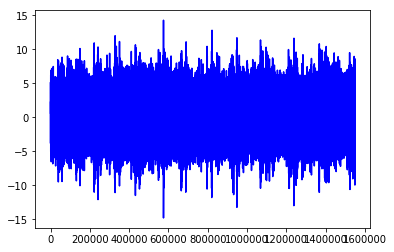

In [34]:
data_dire=os.path.join(source_dire,'0'+str(3),'Sensor')
print(data_dire)
for _ in range(10,11):
    print(_)
    df_signal=pd.read_csv(os.path.join(data_dire,str(_)+".csv"))
#     print(df_signal.head(1000))
    plt_plot(df_signal["vibration_1"])
#     plt_plot(df_signal["vibration_2"])
    # plt_plot(df_signal["vibration_3"])
#     plt_plot(df_signal["current"])

In [67]:
data_dire=os.path.join(source_dire,'0'+str(3),'Sensor1')
df_sensor_raw=pd.read_csv(os.path.join(data_dire,str(6)+".csv"))
nan_table=np.where(np.isnan(df_signal))
if nan_table:
    print(nan_table)        
# for nan_index in range(len(nan_table[1])):
#     df_sensor_raw.iloc[nan_table[0][nan_index]][nan_table[1][nan_index]]=df_sensor_raw.iloc[nan_table[0][nan_index]-1][nan_table[1][nan_index]]
# print(np.where(np.isnan(df_sensor_raw)))

(array([988737, 988738, 988794, 989317, 990486, 990628, 990941, 990942,
       991291, 991292, 991293, 991355, 994828, 994865, 994891, 994973,
       995272, 995273, 995274, 995285, 995405, 995447, 995462, 995463,
       997664, 997885, 997886]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1]))


In [50]:
print(df_signal.iloc[98837][2]) 

-1.5639158519999998
